In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from mpl_toolkits.mplot3d import axes3d

$$  w(x,y) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} \frac{a_{mn}}{\pi^{4}D} (\frac{m^{2}}{a^{2}} + \frac{n^{2}}{b^{2}} )^{2}  sin (\frac{m\pi x}{a}) sin (\frac{n\pi y}{b})  $$

donde,

$$a_{mn} =  \frac{4P}{ab} sin(\frac{m\pi \xi}{a}) sin(\frac{n\pi \eta}{b}) $$ 

In [8]:
A = np.random.rand(100,100)

In [9]:
def Sum1(A):
    return np.sum(A)

In [11]:
def Sum2(A):
    
    M, N = A.shape
    Sum_ = 0.
    
    for i in range(M):
        for j in range(N):
            Sum_ += A[i,j]
            
    return Sum_

In [10]:
%timeit Sum1(A)

6.38 µs ± 68.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit Sum2(A)

1.39 ms ± 39.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
@nb.jit('f8(f8[:,:])')
def Sum_numba(A):
    
    M, N = A.shape
    Sum_ = 0.
    
    for i in range(M):
        for j in range(N):
            Sum_ += A[i,j]
            
    return Sum_

In [14]:
%timeit Sum_numba(A)

10.5 µs ± 96.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
@nb.njit 
def getamn(P,a,b,xi,eta,m,n):
    return 4 * P * np.sin( m * np.pi * xi / a ) * np.sin( n * np.pi * eta / b ) / (a * b)

In [19]:
@nb.njit
def Deformacion(x,y,w,a,b,P,xi,eta,D,max_m, max_n):
    M,N = w.shape
    for m in range(1,max_m):
        for n in range(1,max_n):
            for i in range(M):
                for j in range(N):
                    amn = getamn(P,a,b,xi,eta,m,n)
                    w[i,j] += amn / ( (m/a)**2 + (n/b)**2 )**2 * np.sin( m*np.pi*x[i,j]/a ) * np.sin( n*np.pi*y[i,j]/b ) / (np.pi**4 * D)

In [20]:
# Geometry
a = 1.
b = 1.
h = 50e-3
# Material
E = 69e9
nu = 0.35
#Series
max_m = 16
max_n = 16

# Grid points
N = 101

# Carga
P = +10e3
xi = a / 2
eta = a / 2

# Flexural rigidity
D = h**3 * E / (12*(1-nu**2))

#Domain
x = np.linspace(0,a,num=N)
y = np.linspace(0,b,num=N)
xx,yy = np.meshgrid(x,y)

w = np.zeros_like(xx)

In [21]:
%timeit Deformacion(xx,yy,w,a,b,P,xi,eta,D,max_m,max_n)

62.1 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
np.abs(w).max()

0.001130542723109815

<IPython.core.display.Javascript object>


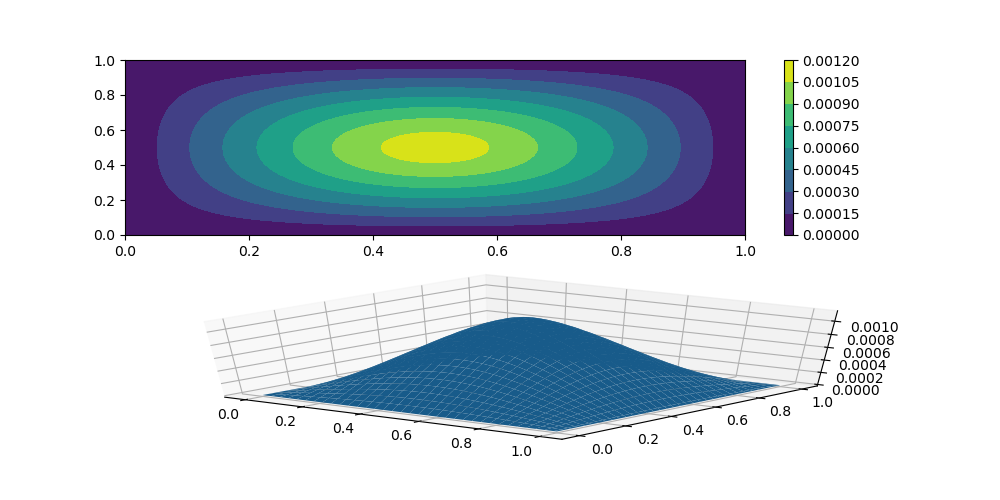

In [23]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, projection='3d')

c = ax1.contourf(xx,yy,w)
fig.colorbar(c, ax = ax1)

ax2.plot_surface(xx,yy,w)